In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

from Jezyki_Skryptowe.JSwAD_lab8_Darul import xLine

ZADANIE 1

In [54]:
def var(X):
    X = np.array(X)
    mean = np.mean(X)
    sum = 0
    for i in range(X.shape[0]):
        sum += (X[i] - mean)**2
    return sum/(len(X)-1)

def covar(X, Y):
    X = np.array(X)
    Y = np.array(Y)
    meanX = np.mean(X)
    meanY = np.mean(Y)
    sum = 0
    for i in range(X.shape[0]):
        sum += (X[i] - meanX)*(Y[i] - meanY)
    return sum/(len(X)-1)

def pearson(X, Y):
    X = np.array(X)
    Y = np.array(Y)
    return covar(X, Y)/np.sqrt(var(X)*var(Y))

ZADANIE 2

In [55]:
def regression(X, Y):
    a = covar(X, Y)/var(X)
    b = np.mean(Y) - (a * np.mean(X))
    return a,b

ZADANIE 3

In [59]:
df = pd.read_html("https://www.naukowiec.org/wiedza/statystyka/kwartet-anscombe-a_3440.html")
df = df[0]
df.columns = ['x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4']
df.drop(0, inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')
df.head()

,x1,y1,x2,y2,x3,y3,x4,y4
1,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
2,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
3,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
4,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
5,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47


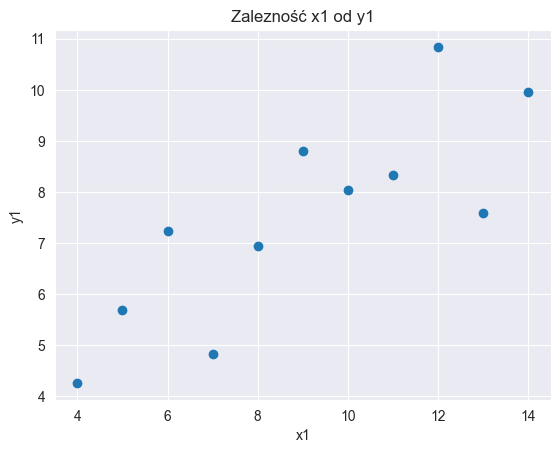

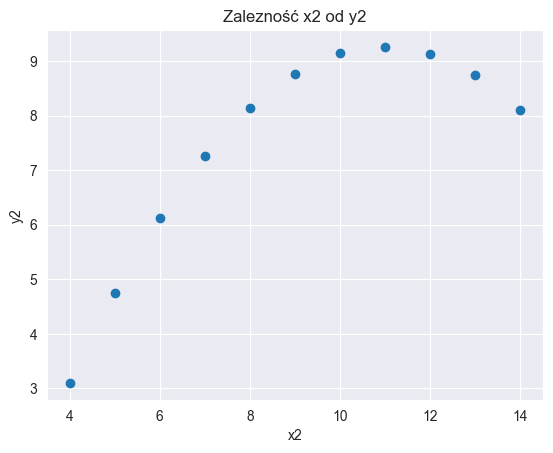

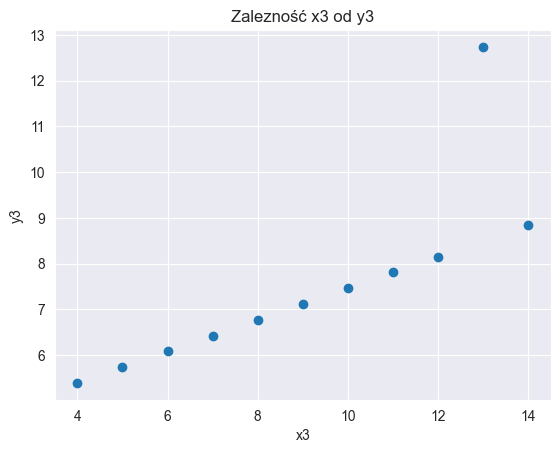

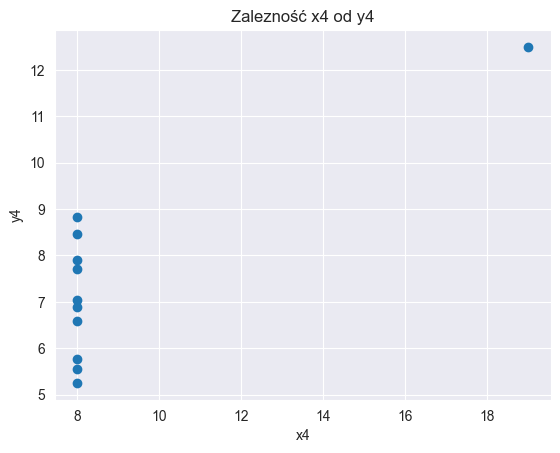

In [57]:
def plot():
    dfX = df[['x1', 'x2', 'x3', 'x4']]
    dfY = df[['y1', 'y2', 'y3', 'y4']]
    for colX, colY in zip(dfX.columns, dfY.columns):
        plt.scatter(dfX[colX], dfY[colY])
        plt.title(f'Zależność {colX} od {colY}')
        plt.xlabel(colX)
        plt.ylabel(colY)
        plt.show()
plot()

ZADANIE 4

In [58]:
dfX = df[['x1', 'x2', 'x3', 'x4']]
dfY = df[['y1', 'y2', 'y3', 'y4']]
for colX, colY in zip(dfX.columns, dfY.columns):
    print(f"Wspolczynnik Pearsona dla {colX} od {colY}: {round(pearson(dfX[colX], dfY[colY]), 3)}")

print("\nWzory regresji: ")
for colX, colY in zip(dfX.columns, dfY.columns):
    a, b = regression(dfX[colX], dfY[colY])
    print(f'y = {a:.1f}x + {b:.1f}')

Wspolczynnik Pearsona dla x1 od y1: 0.816
Wspolczynnik Pearsona dla x2 od y2: 0.816
Wspolczynnik Pearsona dla x3 od y3: 0.816
Wspolczynnik Pearsona dla x4 od y4: 0.817

Wzory regresji: 
y = 0.5x + 3.0
y = 0.5x + 3.0
y = 0.5x + 3.0
y = 0.5x + 3.0


ZADANIE 5

                            OLS Regression Results                            
Dep. Variable:                     y1   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.99
Date:                Thu, 27 Nov 2025   Prob (F-statistic):            0.00217
Time:                        12:28:10   Log-Likelihood:                -16.841
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0001      1.125      2.667      0.0

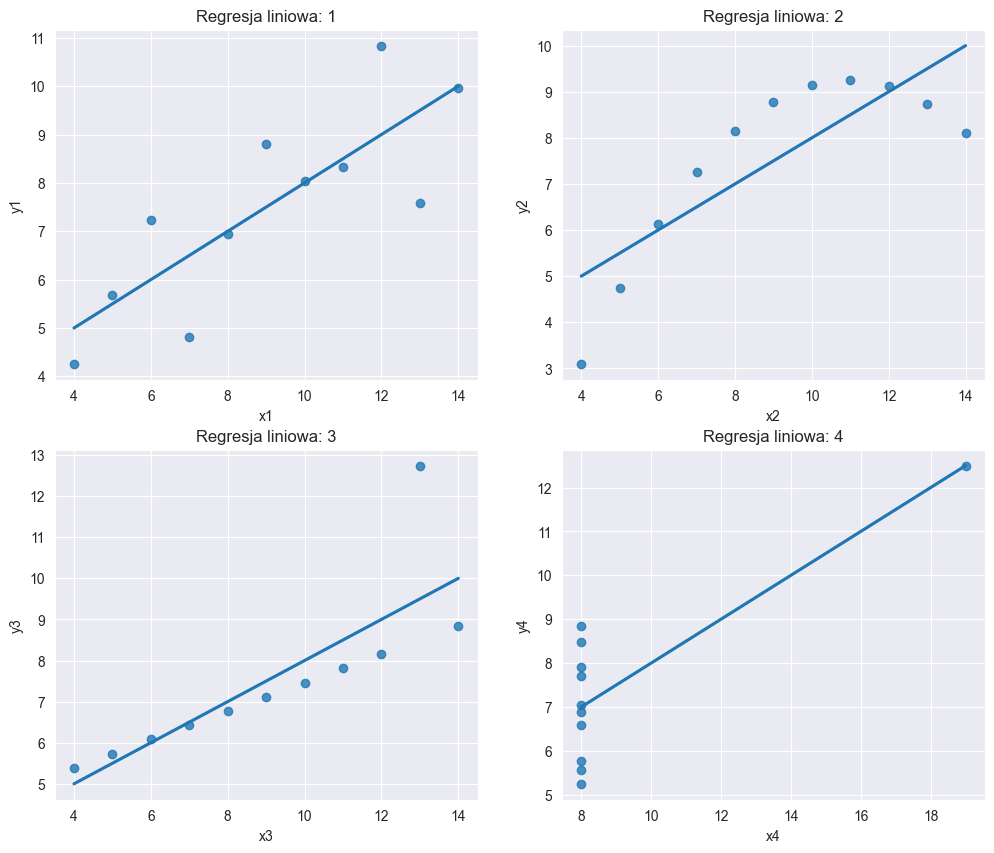

In [68]:
for i in range(1,5):
    X = df[f'x{i}']
    Y = df[f'y{i}']

    X_sm = sm.add_constant(X)
    model = sm.OLS(Y, X_sm).fit()

    print(model.summary())

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, i in enumerate([1,2,3,4]):
    ax = axes[idx]
    sns.regplot(x=df[f'x{i}'], y=df[f'y{i}'], ax=ax, ci=None)
    ax.set_title(f'Regresja liniowa: {i}')
    ax.set_xlabel(f'x{i}')
    ax.set_ylabel(f'y{i}')

plt.show()